___
# PROJETO 1

## <font color='red'>Daniel Ruhman</font>
___

## <font color='blue'>Distribuição de renda entre aposentados de sexos opostos e diferentes raças </font>

## Introdução

Ao comparar a renda da aposentadoria paga a aposentados de diferentes raças que fizeram faculdade, pretendo analisar se existe uma discriminação implícita na remuneração brasileira. Além disso, pretendo fazer a mesma coisa para   homens e mulheres aposentados, visando descobrir se existe algum padrão sexista na remuneração brasileira.

Algo como http://www.cnbc.com/2015/10/19/-gender-gap.html , uma análise de uma pesquisa que mostra a diferença na renda média anual de homens e mulheres aposentados e explica como uma herança sexista com diferença de salários ao longo da vida (menores se comparados a homens em cargos semelhantes) afeta a aposentadoria das mulheres. Muito bem feita, essa análise utiliza principalmente a renda média dos aposentados, e a relaciona com duração média da aposentadoria, custos de saúde, economia por parte do indivíduo etc para mostrar uma imagem completa do estado atual da aposentadoria feminina.


___
## Análise e Resultados

In [140]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [141]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/daniruhman/Dropbox/Insper/Ciencia dos Dados/CD-Daniel Ruhman-Git/Projeto1


In [142]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [143]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

In [144]:
pnad2014.columns = estrutura.Coluna

Vamos agora iniciar a filtração dos dados. Para a análise inicial, vamos extrair os aposentados do banco de dados. Depois, filtraremos por diploma de faculdade (para termos uma análise de renda mais justa, posteriormente). Por fim, filtraremos a idade para excluir exceções e manter um conjunto de dados coerente.

In [145]:
aposentados = pnad2014[pnad2014.V9122 == 2] #pegar apenas os aposentados, 1a var
print("Número de aposentados:", aposentados.V0101.count())
comDiploma = aposentados[aposentados.V6007>=8] #pegar apenas quem tem diploma de faculdade, 2a var
print("Número de aposentados com diploma de faculdade:", comDiploma.V0101.count())
idadeCorreta = comDiploma[(comDiploma.V8005>=40)&(comDiploma.V8005<=90)] # filtrar idade para remover excessões, 3a var
print("Número de aposentados com diploma de faculdade e idade corrigida:", idadeCorreta.V0101.count())

Número de aposentados: 38643
Número de aposentados com diploma de faculdade: 5459
Número de aposentados com diploma de faculdade e idade corrigida: 5401


count    5401.000000
mean       64.788002
std         8.928048
min        40.000000
25%        59.000000
50%        64.000000
75%        70.000000
max        90.000000
Name: V8005, dtype: float64

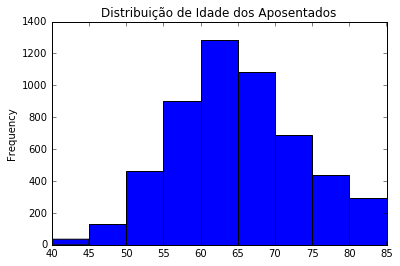

In [146]:
faixas = np.arange(40,90,5)
idadeCorreta.V8005.plot.hist(title="Distribuição de Idade dos Aposentados",bins=faixas)
idadeCorreta.V8005.describe()

A partir dessa análise, observamos que a idade média dos aposentados brasileiros é ~ 64.79% , e que 50% dos aposentados do país se concentram entre 59-70 anos de idade. Dentro do esperado. Vamos partir agora para a análise racial:

Branca      65.395297
Parda       27.643029
Preta        5.350861
Amarela      1.221996
Indígena     0.388817
dtype: float64

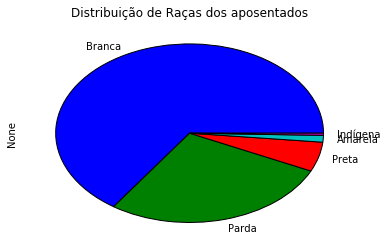

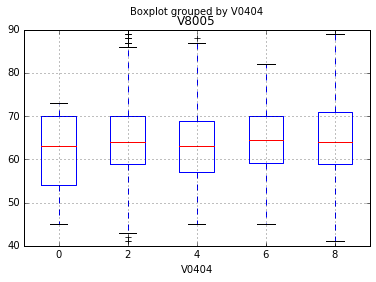

In [147]:
#distribuição da idade pelas diferentes raças
raca = idadeCorreta.V0404.astype('category',ordered=True) #classificar idade como dados quantitavos e categorizar, 4a var
raca.cat.categories = ("Indígena","Branca","Preta","Amarela","Parda")
raca.value_counts().plot(kind='pie',title="Distribuição de Raças dos aposentados")
idadeCorreta.boxplot(column="V8005", by="V0404")
raca.value_counts(True)*100

Ao plotarmos o grupo-alvo de aposentados pelas suas raças reportadas, percebemos dados condizentes com a realidade brasileira (de acordo com o último censo). Ao fazermos os boxplots das diferentes raças pela idade dos respectivos aposentados, notamos que a idade média dos dos aposentados é semelhante entre as diferentes raças. Além disso, observamos que os indígenas (0 no eixo X) não apresentam muitas pessoas de idade elevada, já que o intervalo inter quartil é mínimo e não há valores extremos.

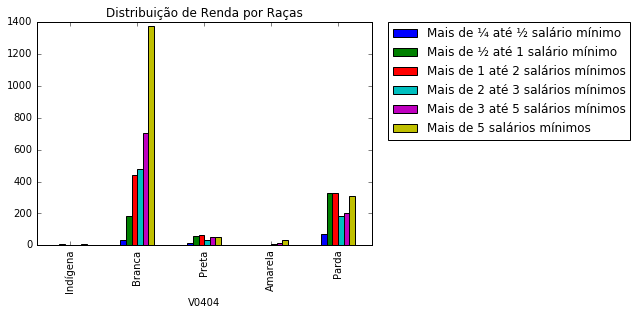

In [148]:
rendaFiltrada = idadeCorreta[(idadeCorreta.V4743 > 0)&(idadeCorreta.V4743 !=99)&(idadeCorreta.V4743 != 1)]#filtrar sem declaração e ate 1/4 salário min
rendaFiltrada1 = rendaFiltrada.V4743.astype('category',ordered=True) #5a var
rendaFiltrada1.cat.categories ="Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos"
racaRenda = pd.crosstab(raca,rendaFiltrada1)
racaRenda.plot.bar(title="Distribuição de Renda por Raças").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


A partir do gráfico acima, fica **evidente a discriminação racial presente na renda da aposentadoria**. Os brancos são, com certeza, favorecidos.

Agora, vamos comparar as diferenças de renda entre aposentados e aposentadas, buscando encontrar algum padrão (ou não) sexista na renda da aposentadoria.

In [149]:
#separar homens de mulheres, 6a var
homens = idadeCorreta[idadeCorreta.V0302 == 2]
mulheres = idadeCorreta[idadeCorreta.V0302 == 4]

sexo = idadeCorreta.V0302.astype('category',ordered=True)
sexo.cat.categories = ("Masculino","Feminino")


renda = idadeCorreta.V4743.astype('category',ordered=True)
renda.cat.categories = "Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","Não Declarado"
sexoRenda = pd.crosstab(sexo,renda)
sexoRenda


V4743,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,Não Declarado
V0302,,,,,,,,
Masculino,4,57,267,353,258,372,810,187
Feminino,6,58,308,486,448,598,964,223


Para melhorar o gráfico gerado e facilitar as conclusões, eliminamos as pessoas com até 1/4 de salário mínimo e as pessoas que não declararam renda.

Feminino     57.230143
Masculino    42.769857
dtype: float64

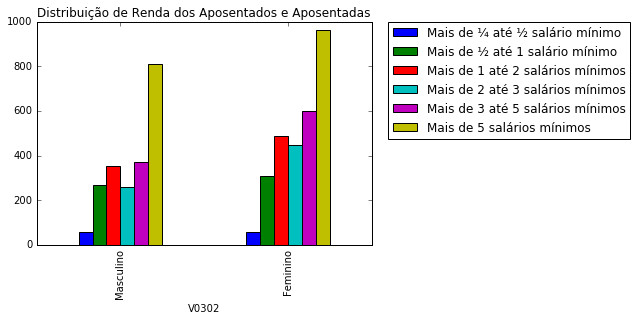

In [150]:
rendaFiltrada = idadeCorreta[(idadeCorreta.V4743 > 0)&(idadeCorreta.V4743 !=99)&(idadeCorreta.V4743 != 1)]
rendaFiltrada = rendaFiltrada.V4743.astype('category',ordered=True)
rendaFiltrada.cat.categories ="Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos"
sexoRenda = pd.crosstab(sexo,rendaFiltrada)
sexoRenda

sexoRenda.plot(kind='bar',title="Distribuição de Renda dos Aposentados e Aposentadas").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sexo.value_counts(True)*100

Observamos que há uma **distribuição de sexos condizente com a realidade**. Ao categorizarmos as faixas de salário, e separando os grupos masculino e feminino, percebemos que a **distribuição é simétrica**.

In [151]:
emprego = idadeCorreta.V9032.astype('category',ordered=True)#7a var
emprego.cat.categories = ("Pública","Privada")
emprego.value_counts()


Privada    355
Pública    355
dtype: int64

Para fins de análise, queria separar as pessoas com empregos públicos e privados. Porém, aparentemente a variável V9032 esta corrompida de alguma maneira, já que para a grande maioria dos usúarios não há valor e, para os que tem, estranhamente esta dividido exatamente meio a meio. Por fim, ela gera o gráfico bizarro abaixo.

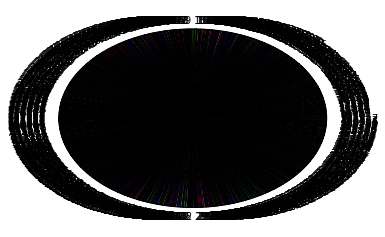

In [152]:
idadeCorreta.V9032.plot.pie()

___

___
## Conclusão 

### Análise Raças:

Ficou evidente a disparidade na renda dos aposentados de diferentes raças. Observamos, claramente, que os brancos são favorecidos. Considerando que todos os usuários analisados tem diploma de faculdade, não há motivo evidente para essa diferença além de **discriminação racial**.


### Análise Sexos:

Diferente do esperado, a conclusão dessa análise é de que a renda da aposentadoria entre homens e mulheres é bem simétrica, de forma a não apontar **nenhuma discriminação sexista**

### Outras conclusões:

A variável V9032 está corrompida de alguma maneira.